In [70]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## Criando conexão inicial com o banco

In [3]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [4]:
connection = create_server_connection("localhost", "root", "259604")

MySQL Database connection successful


In [5]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [6]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [7]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [8]:
dadosEstudantes = []
colunas = ["Matrículas", "Status", "Estudante", "Disciplina"]

In [42]:
q1 = """
select distinct Matriculas, Status, IDEstudante, IDDisciplina from(
	select distinct * from student_data.dados 
	inner join student_data.fluxos on
	student_data.dados.IDFluxo =  student_data.fluxos.Fluxo where Abrev = "AEROESPACIAL") igualarFluxo where Status != 1 ;
"""

connection = create_db_connection("localhost", "root", "259604", "student_data")
results = read_query(connection, q1)

for result in results:
  dadosEstudantes.append(result)

MySQL Database connection successful


In [43]:
df = pd.DataFrame(dadosEstudantes, columns = colunas)

df.head()

,Matrículas,Status,Estudante,Disciplina
0,1,1,27990,ENM0068
1,1,1,27990,ENM0071
2,1,1,27990,FGA0008
3,1,1,27990,FGA0021
4,1,1,27990,FGA0037


In [44]:
df.dtypes

Matrículas     int64
Status         int64
Estudante      int64
Disciplina    object
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17941 entries, 0 to 17940
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Matrículas  17941 non-null  int64 
 1   Status      17941 non-null  int64 
 2   Estudante   17941 non-null  int64 
 3   Disciplina  17941 non-null  object
dtypes: int64(3), object(1)
memory usage: 560.8+ KB


array([1, 2, 5], dtype=int64)

In [47]:
df['Matrículas'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [48]:
df['Disciplina'].unique()

array(['ENM0068', 'ENM0071', 'FGA0008', 'FGA0021', 'FGA0037', 'FGA0038',
       'FGA0039', 'FGA0043', 'FGA0044', 'FGA0048', 'FGA0050', 'FGA0063',
       'FGA0066', 'FGA0075', 'FGA0117', 'FGA0134', 'FGA0139', 'FGA0148',
       'FGA0150', 'FGA0157', 'FGA0160', 'FGA0161', 'FGA0162', 'FGA0164',
       'FGA0167', 'FGA0169', 'FGA0181', 'FGA0184', 'FGA0186', 'FGA0187',
       'FGA0188', 'FGA0197', 'FGA0204', 'FGA0235', 'FGA0250', 'FGA0254',
       'MAT0027', 'CIC0007', 'DEG0204', 'ENE0277', 'ENM0080', 'FGA0009',
       'FGA0011', 'FGA0034', 'FGA0045', 'FGA0046', 'FGA0049', 'FGA0052',
       'FGA0055', 'FGA0056', 'FGA0064', 'FGA0065', 'FGA0067', 'FGA0069',
       'FGA0090', 'FGA0106', 'FGA0133', 'FGA0143', 'FGA0144', 'FGA0153',
       'FGA0155', 'FGA0166', 'FGA0168', 'FGA0178', 'FGA0179', 'FGA0180',
       'FGA0191', 'FGA0193', 'FGA0196', 'FGA0212', 'FGA0229', 'FGA0233',
       'IFD0173', 'IQD0125', 'IQD0126', 'MAT0024', 'MAT0026', 'MAT0030',
       'MAT0048', 'CIC0004', 'CIC0088', 'FGA0005', 

In [49]:
df['Estudante'].unique()

array([27990, 27760, 27769, 27766, 27810, 27807, 27842, 27806, 27809,
       27811, 27812, 27262, 27263, 27264, 27282, 27285, 27286, 27325,
       27238, 27516, 27479, 27357, 26253, 26255, 26258, 26257, 26298,
       26352, 26386, 26606, 26349, 26351, 24330, 24071, 24308, 24331,
       24348, 24350, 24352, 24600, 24673, 24674, 24679, 24680, 24597,
       18484, 18486, 18507, 18999, 19041, 14162, 27991, 27768, 27767,
       27305, 27203, 27261, 27468, 27356, 27469, 26256, 26348, 26605,
       26390, 26350, 24306, 24016, 24304, 24307, 24324, 24325, 24326,
       24328, 24333, 24334, 24335, 24344, 24345, 24346, 24351, 24347,
       24329, 24149, 24580, 24599, 24080, 24645, 24677, 24681, 24675,
       18626, 18579, 18585, 18589, 18312, 18586, 18587, 18591, 18592,
       18593, 18467, 18485, 18487, 18588, 18590, 18300, 18594, 18508,
       18989, 18990, 18996, 19025, 19042, 18992, 18995, 19022, 19023,
       19024, 19029, 19039, 19043, 19045, 18991, 18997, 19028, 19040,
       18998, 19044,

In [50]:
X = df.drop(['Status'], axis=1).copy()
X.head()

,Matrículas,Estudante,Disciplina
0,1,27990,ENM0068
1,1,27990,ENM0071
2,1,27990,FGA0008
3,1,27990,FGA0021
4,1,27990,FGA0037


In [51]:
y = df['Status'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [52]:
X_encoded = pd.get_dummies(X, columns=['Disciplina'])
X_encoded.head()

,Matrículas,Estudante,Disciplina_ADM0023,Disciplina_ADM0092,Disciplina_CIC0004,Disciplina_CIC0007,Disciplina_CIC0088,Disciplina_CIC0090,Disciplina_CIC0197,Disciplina_DEG0204,...,Disciplina_MAT0025,Disciplina_MAT0026,Disciplina_MAT0027,Disciplina_MAT0030,Disciplina_MAT0031,Disciplina_MAT0038,Disciplina_MAT0048,Disciplina_MAT0053,Disciplina_MAT0059,Disciplina_MAT0137
0,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y.unique()

array([1, 2, 5], dtype=int64)

In [54]:
len(X_encoded)

17941

In [55]:
len(y)

17941

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

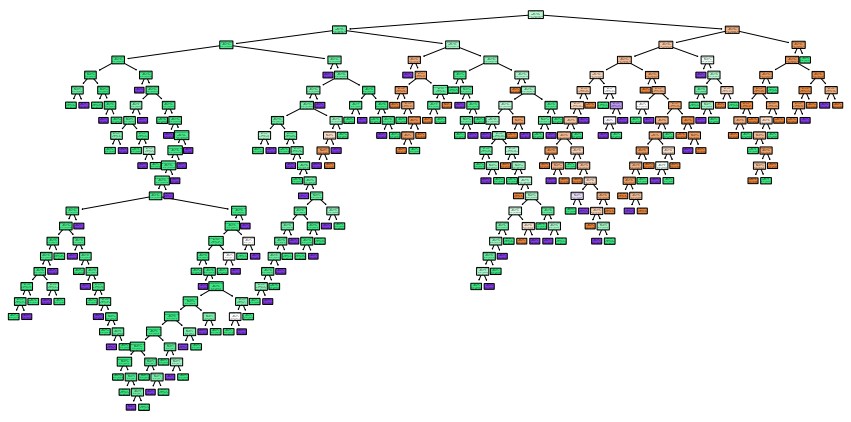

In [57]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True,
        class_names=["Formado", "Matrículado", "Evadido"],
        feature_names=X_encoded.columns)

c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


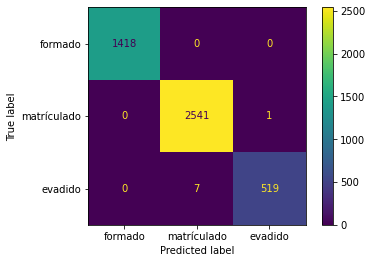

In [58]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels =["formado", "matrículado", "evadido"])

<AxesSubplot:xlabel='tree'>

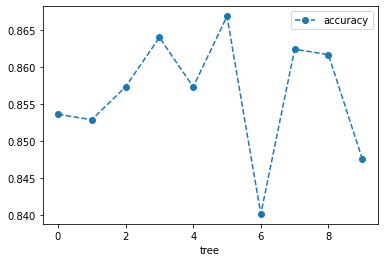

In [63]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.004)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

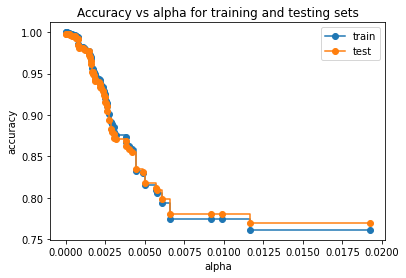

In [64]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label ="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='alpha'>

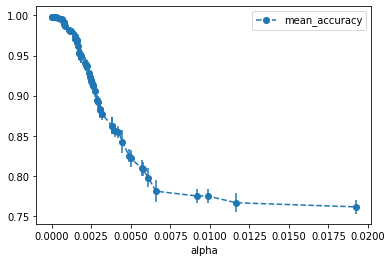

In [65]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

In [66]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [71]:
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       0.71      0.84      0.77      1418
           2       0.80      0.89      0.85      2542
           5       0.00      0.00      0.00       526

    accuracy                           0.77      4486
   macro avg       0.50      0.58      0.54      4486
weighted avg       0.68      0.77      0.72      4486



c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,